In [14]:
import pandas as pd
import numpy as np

In [15]:
root_dir ="/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/"
extra_path = ("DDimsNS_NewLongerDriftEvalExp_MSEs_1024NPaths").replace(
            ".", "")
score_eval=pd.read_parquet(root_dir + extra_path+ "_score_MSE.parquet", engine="fastparquet")
nad_eval=pd.read_parquet(root_dir + extra_path+ "_nad_MSE.parquet")
nad_eval_true_law=pd.read_parquet(root_dir + extra_path+"_nad_true_law_MSE.parquet")
score_eval_true_law=pd.read_parquet(root_dir + extra_path+"_score_true_law_MSE.parquet")
score_state_eval=pd.read_parquet(root_dir + extra_path+ "_score_state_MSE.parquet")
nad_state_eval=pd.read_parquet(root_dir + extra_path+ "_nad_state_MSE.parquet")
stable_state_eval = (pd.concat([score_state_eval.rename({d:d+" Score State" for d in score_state_eval.columns}, axis=1),nad_state_eval.rename({d:d+" Nadaraya State" for d in score_state_eval.columns}, axis=1)], axis=1)).iloc[:257,:]
stable_true_law_eval = (pd.concat([score_eval_true_law.rename({d:d+" Score True" for d in score_state_eval.columns}, axis=1),nad_eval_true_law.rename({d:d+" Nadaraya True" for d in score_state_eval.columns}, axis=1)], axis=1)).iloc[:256,:]
stable_alt_law_eval = (pd.concat([score_eval.rename({d:d+" Score" for d in score_state_eval.columns}, axis=1),nad_eval.rename({d:d+" Nadaraya" for d in score_state_eval.columns}, axis=1)], axis=1)).iloc[:256,:]

In [16]:
time_ax = np.linspace(1/256, 1/256*(stable_true_law_eval.shape[0]),stable_true_law_eval.shape[0])

In [17]:
true_law_eval = stable_true_law_eval.sort_index(axis=1).set_index(time_ax)

In [18]:
alt_law_eval = stable_alt_law_eval.sort_index(axis=1).set_index(time_ax)

In [19]:
state_eval = stable_state_eval.iloc[1:, :].sort_index(axis=1).set_index(time_ax)**2

In [20]:
true_law_eval

,12DDimsNS Nadaraya True,12DDimsNS Score True,8DDimsNS Nadaraya True,8DDimsNS Score True
0.003906,254.024170,315.130829,175.047150,189.380707
0.007812,402.361206,467.949036,263.505554,275.855835
0.011719,508.641968,576.888590,319.024699,332.046549
0.015625,582.984619,654.765991,371.136322,385.219788
0.019531,634.523877,707.877637,409.516162,424.593750
...,...,...,...,...
0.984375,1516.491195,1683.192708,1021.630952,1153.958829
0.988281,1516.813118,1683.635375,1021.778965,1154.352396
0.992188,1517.033588,1683.820743,1022.014272,1154.798597
0.996094,1517.470956,1684.256985,1022.314461,1155.362745


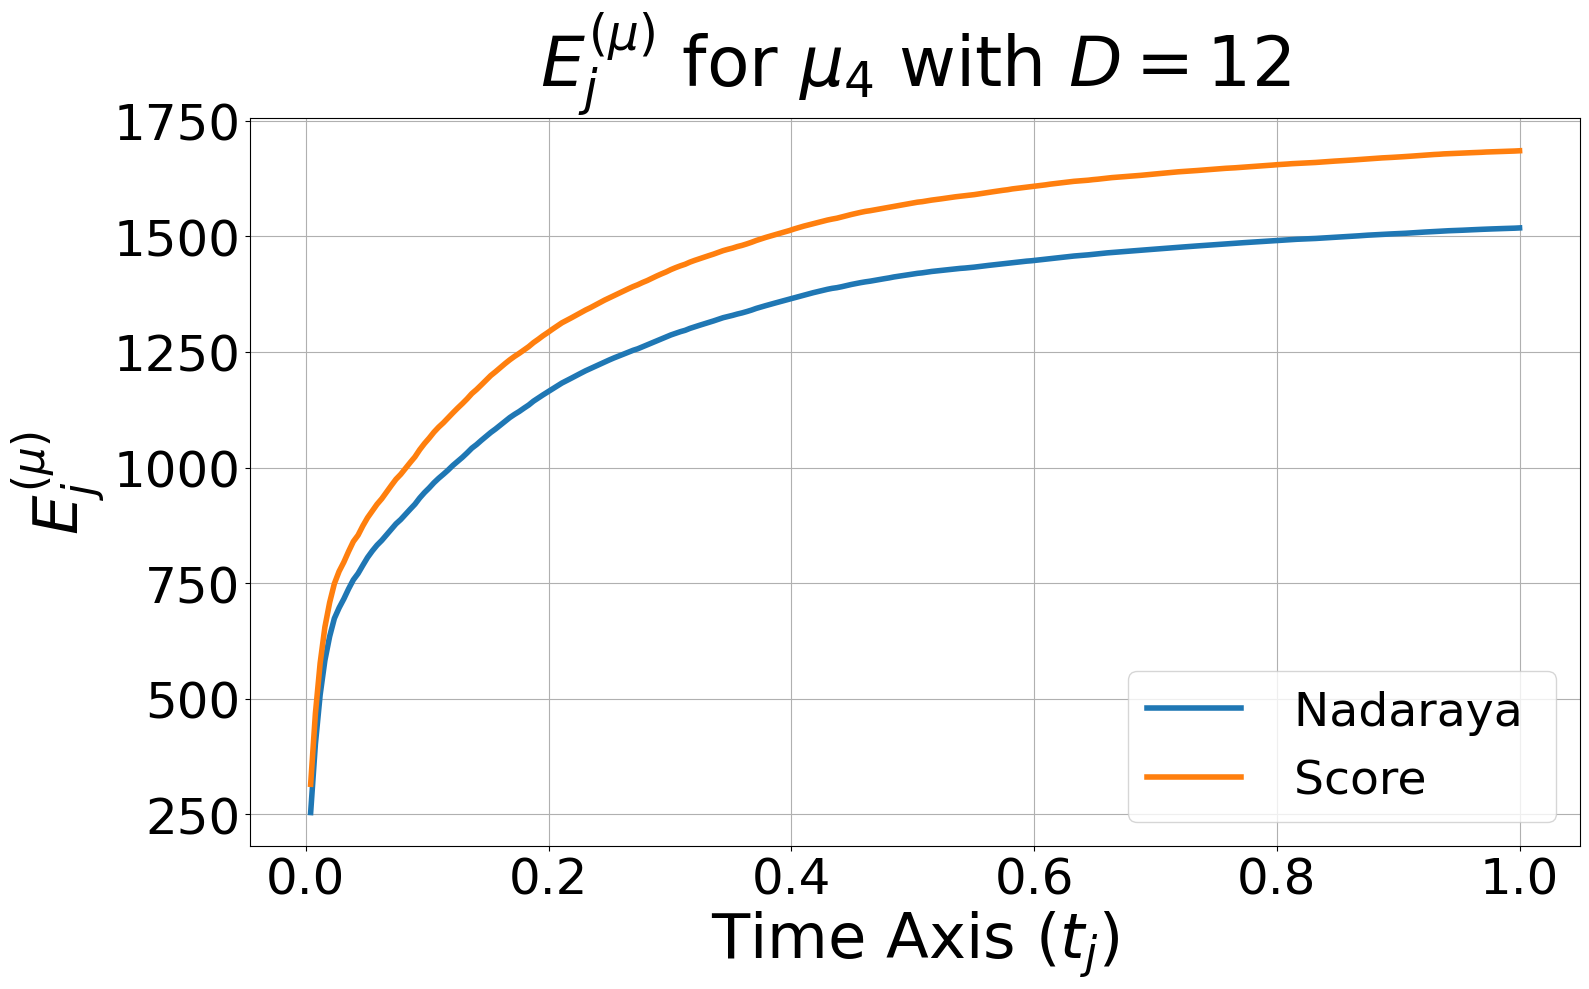

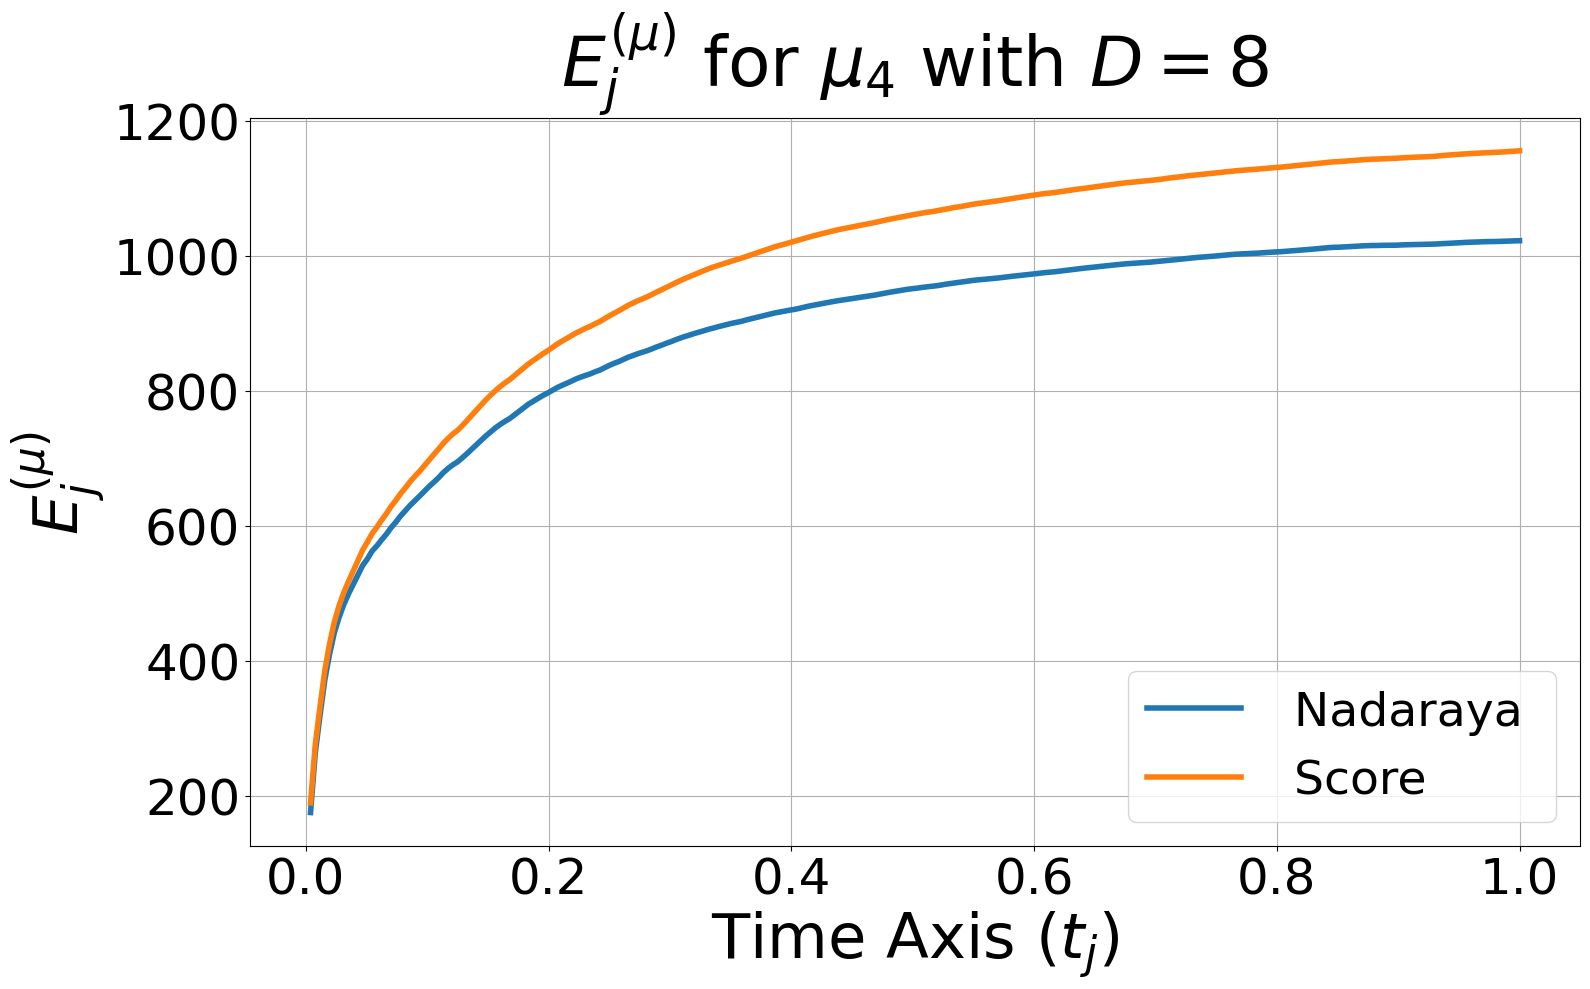

In [21]:
import matplotlib.pyplot as plt
for k in range(0, true_law_eval.shape[1], 2):
    fig, ax = plt.subplots(figsize=(16, 10))
    currevals = true_law_eval.iloc[:, k:k+2]
    d = true_law_eval.columns[k].split('DDimsNS')[0]
    currevals.rename({d:d.split("DDimsNS")[-1].replace("True", "") for d in currevals.columns}, axis=1).plot(ax=ax, linewidth=4)
    plt.legend(fontsize=34)
    ax.tick_params(labelsize=36)
    plt.title(rf"$E^{{(\mu)}}_j$ for $\mu_4$ with $D={d}$", fontsize=50)
    plt.ylabel(rf"$E^{{(\mu)}}_j$", fontsize=45)
    plt.xlabel("Time Axis ($t_j$)", fontsize=45)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/DiffusionModelPresentationImages/LessData/{d}DDimsNSTrueLawLessData.png")
    plt.show()
    plt.close()

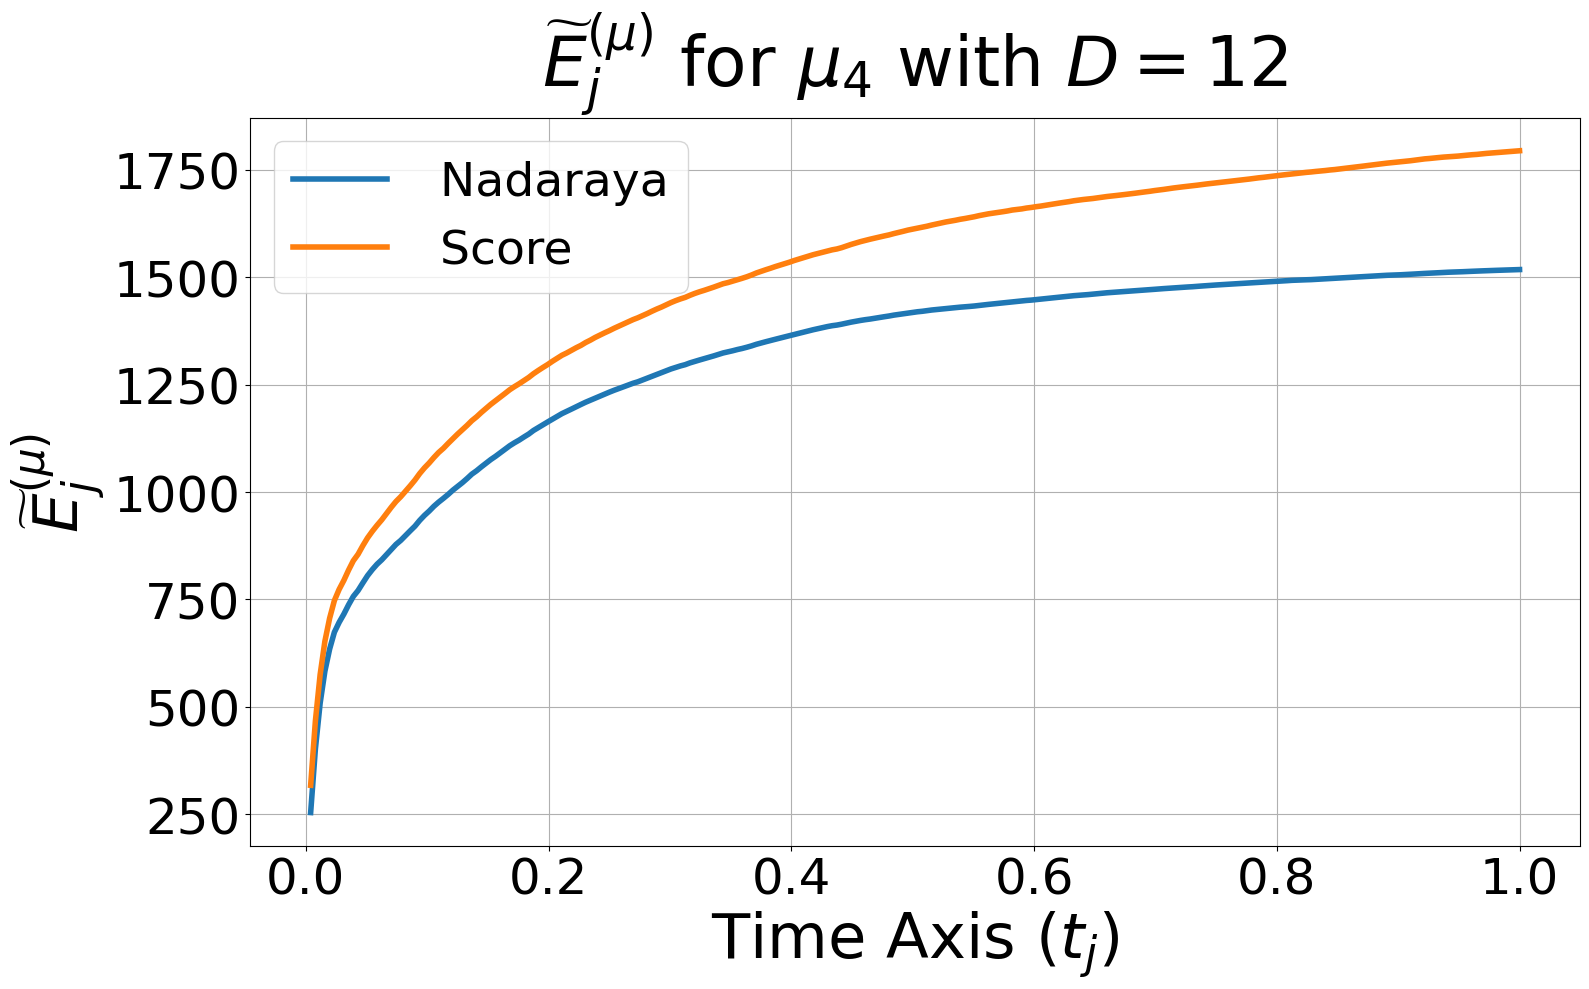

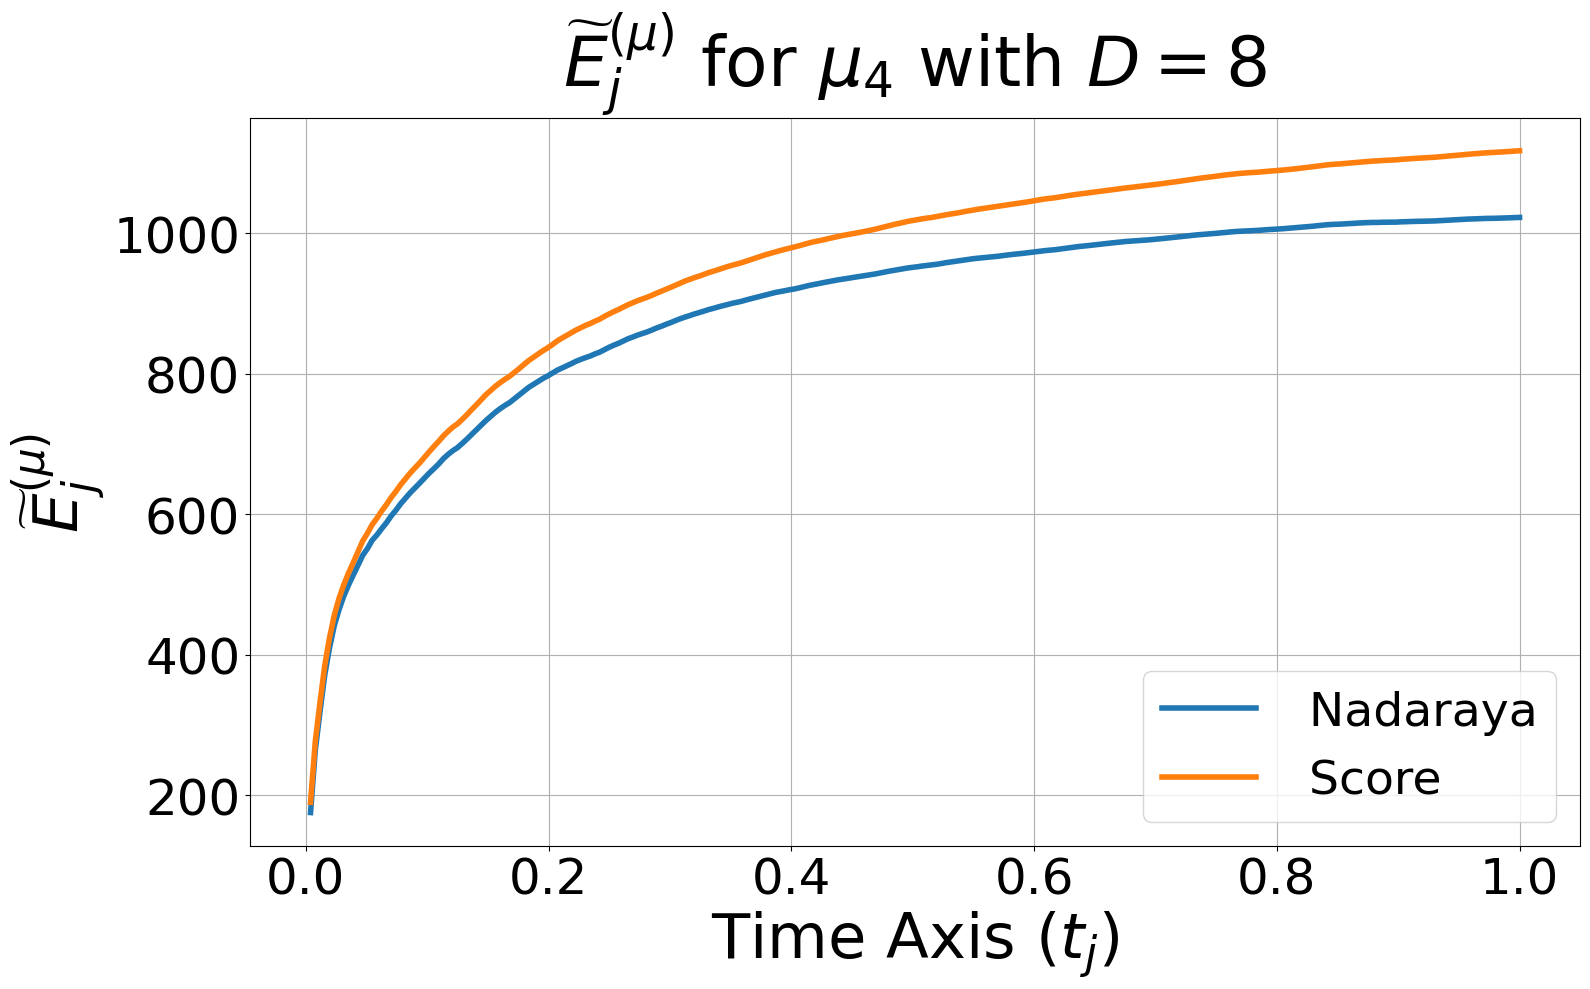

In [22]:
import matplotlib.pyplot as plt
for k in range(0, alt_law_eval.shape[1], 2):
    fig, ax = plt.subplots(figsize=(16, 10))
    currevals = alt_law_eval.iloc[:, k:k+2]
    currevals.rename({d:d.split("DDimsNS")[-1].replace("True", "") for d in currevals.columns}, axis=1).plot(ax=ax, linewidth=4)
    plt.legend(fontsize=34)
    ax.tick_params(labelsize=36)
    d = alt_law_eval.columns[k].split('DDimsNS')[0]
    plt.title(rf"${{\widetilde{{E}}}}^{{(\mu)}}_j$ for $\mu_4$ with $D={d}$", fontsize=50)
    plt.ylabel(rf"${{\widetilde{{E}}}}^{{(\mu)}}_j$", fontsize=45)
    plt.xlabel("Time Axis ($t_j$)", fontsize=45)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/DiffusionModelPresentationImages/LessData/{d}DDimsNSAltLawLessData.png")
    plt.show()
    plt.close()

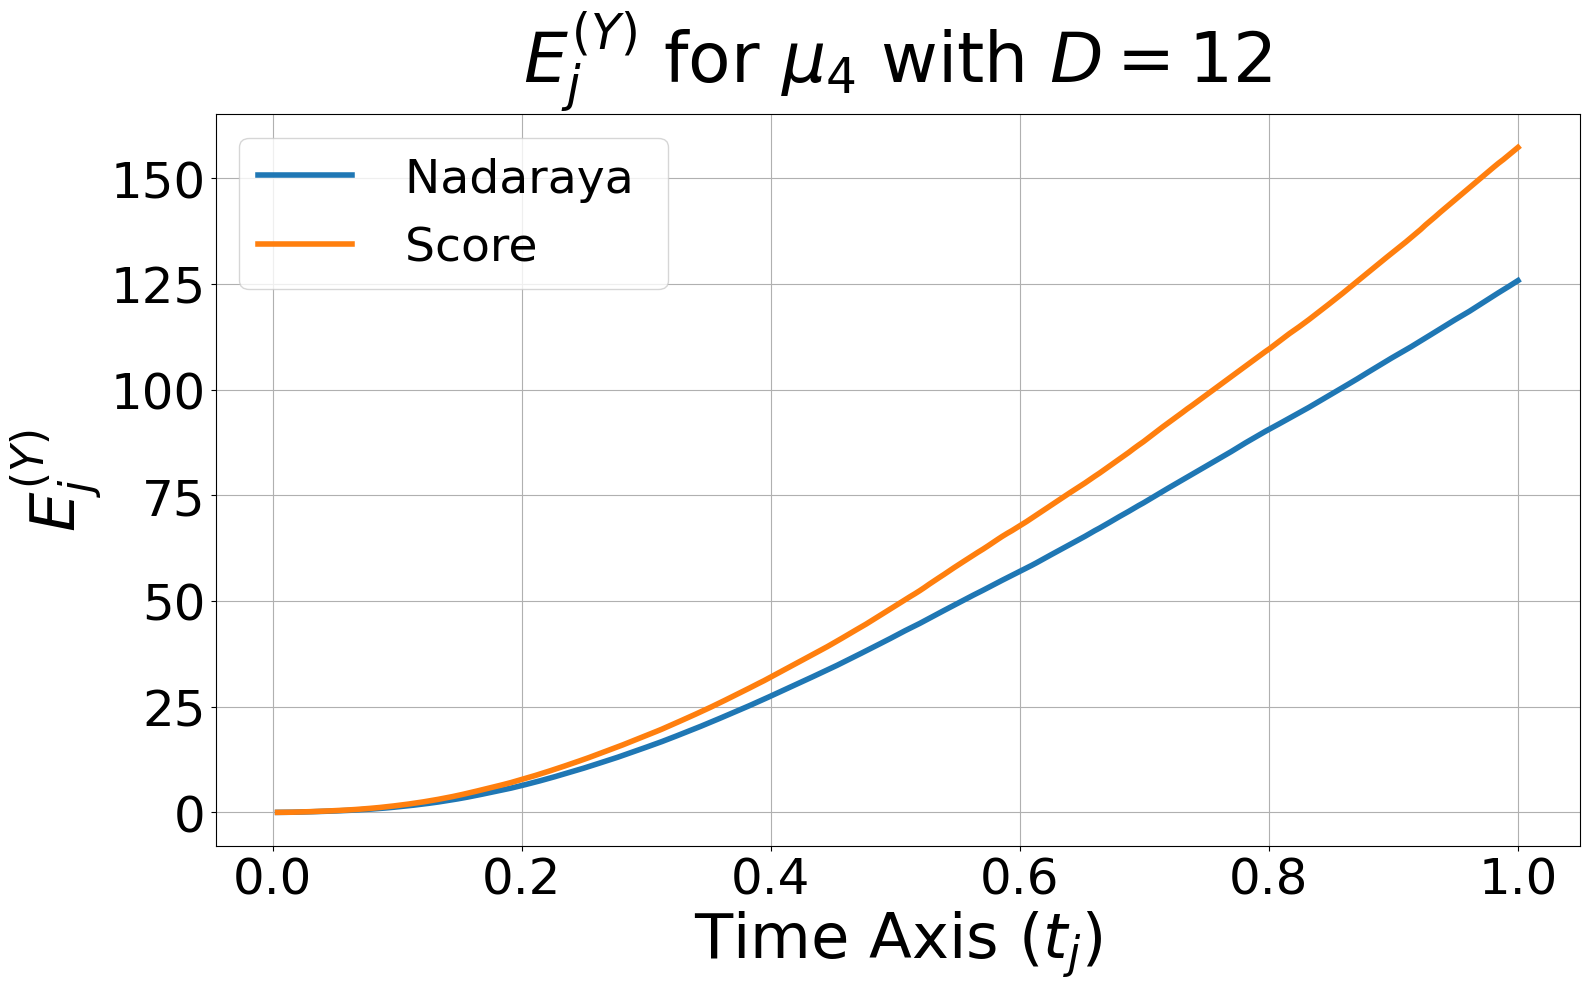

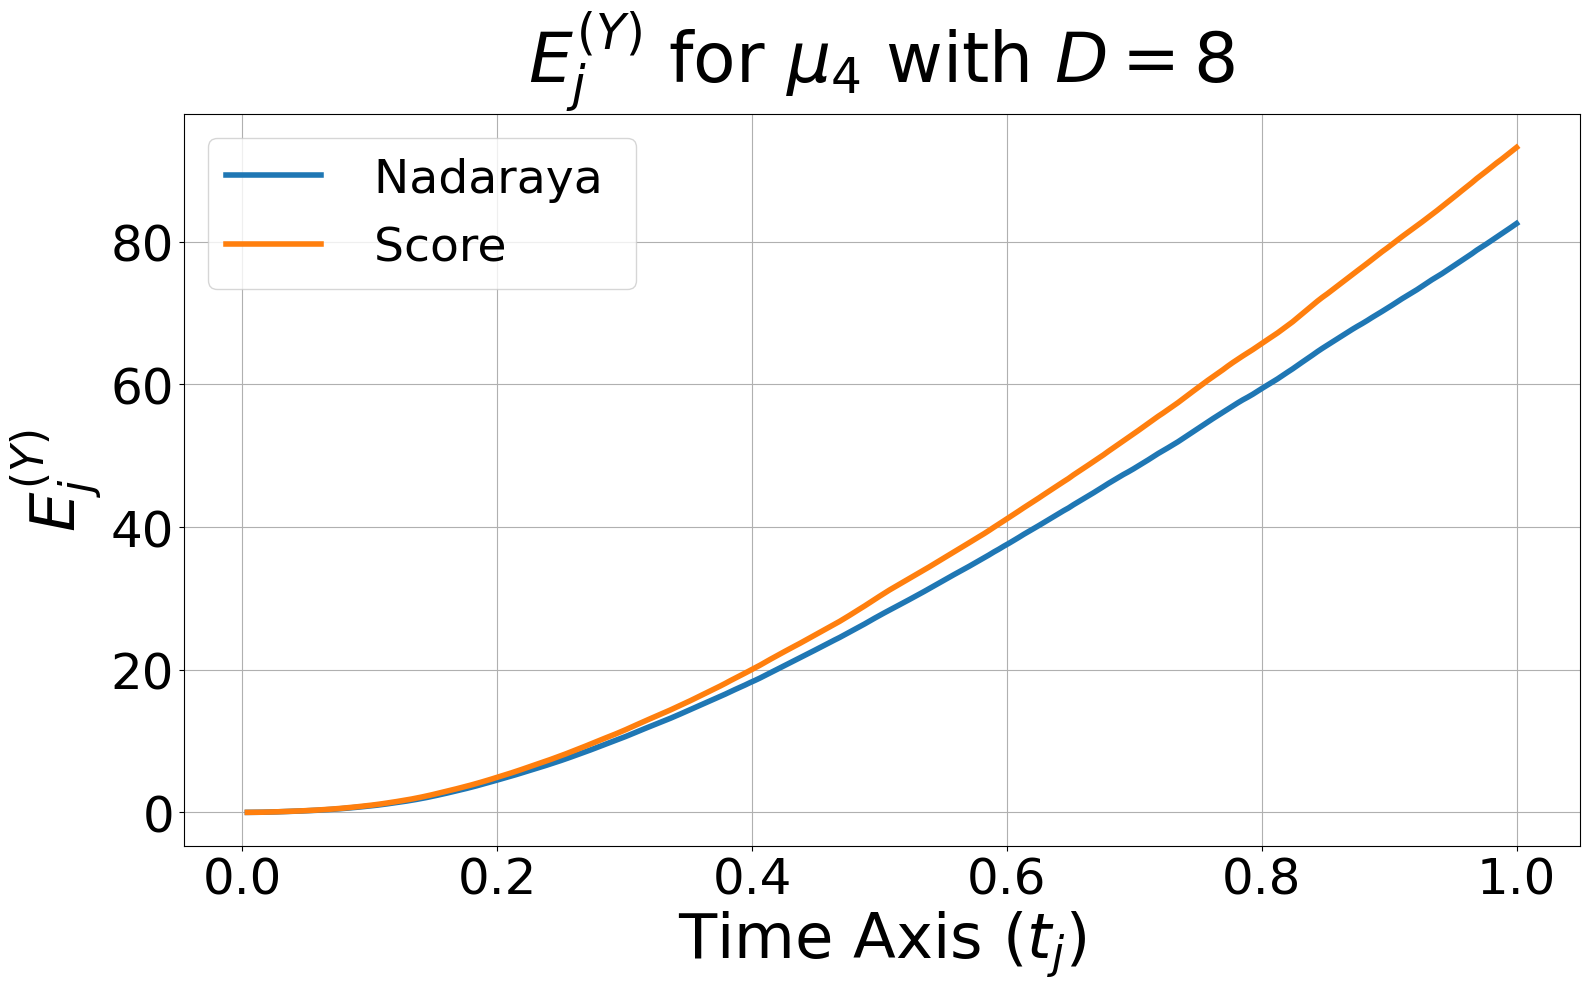

In [23]:
import matplotlib.pyplot as plt
for k in range(0, state_eval.shape[1], 2):
    fig, ax = plt.subplots(figsize=(16, 10))
    currevals = state_eval.iloc[:, k:k+2]
    currevals.rename({d:d.split("DDimsNS")[-1].replace("State", "") for d in currevals.columns}, axis=1).plot(ax=ax, linewidth=4)
    plt.legend(fontsize=34)
    ax.tick_params(labelsize=36)
    d = state_eval.columns[k].split('DDimsNS')[0]
    plt.title(rf"$E^{{(Y)}}_j$ for $\mu_4$ with $D={d}$", fontsize=50)
    plt.ylabel(rf"$E^{{(Y)}}_j$", fontsize=45)
    plt.xlabel("Time Axis ($t_j$)", fontsize=45)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/DiffusionModelPresentationImages/LessData/{d}DDimsNSStateErrorLessData.png")
    plt.show()
    plt.close()

In [24]:
s=(true_law_eval.iloc[[-1], :].T.assign(D=lambda x: x.index.map(lambda y:int(y.split('DDimsNS')[0]))).assign(T=lambda x: x.index.map(lambda y:"_Nadaraya" if "Nad" in y else "Score")).sort_values("T", axis=0).set_index("D").groupby(level=0, axis=0, group_keys=True).apply(lambda x: x.set_index("T"))).iloc[:, 0].unstack(level=-1).round(3)
s

T,Score,_Nadaraya
D,,
8,1155.877,1022.584
12,1684.798,1518.011


In [25]:
s=(alt_law_eval.iloc[[-1], :].T.assign(D=lambda x: x.index.map(lambda y:int(y.split('DDimsNS')[0]))).assign(T=lambda x: x.index.map(lambda y:"_Nadaraya" if "Nad" in y else "Score")).sort_values("T", axis=0).set_index("D").groupby(level=0, axis=0, group_keys=True).apply(lambda x: x.set_index("T"))).iloc[:, 0].unstack(level=-1).round(3)
s

T,Score,_Nadaraya
D,,
8,1117.53,1022.583
12,1794.57,1518.011


In [26]:
s=(state_eval.iloc[[-1], :].T.assign(D=lambda x: x.index.map(lambda y:int(y.split('DDimsNS')[0]))).assign(T=lambda x: x.index.map(lambda y:"_Nadaraya" if "Nad" in y else "Score")).sort_values("T", axis=0).set_index("D").groupby(level=0, axis=0, group_keys=True).apply(lambda x: x.set_index("T"))).iloc[:, 0].unstack(level=-1).round(3)
s

T,Score,_Nadaraya
D,,
8,93.209,82.541
12,157.253,125.762
